In [50]:
import pickle
import  matplotlib.pyplot as plt
import numpy as np

In [51]:
# Función para añadir ruido a la señal

def add_noise(signal, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

# Función para generar diferentes modulaciones
def modulate_psk(M, num_symbols):
    symbols = np.arange(M)
    angles = 2 * np.pi * symbols / M
    signal = np.exp(1j * angles)
    indices = np.random.randint(0, M, num_symbols)
    return signal[indices]

def modulate_qam(M, num_symbols):
    m = int(np.sqrt(M))
    real = np.repeat(np.arange(-m+1, m, 2), m)
    imag = np.tile(np.arange(-m+1, m, 2), m)
    signal = real + 1j * imag
    indices = np.random.randint(0, M, num_symbols)
    return signal[indices]

In [52]:
file_path = r'C:\dataset-constelations\Dataset-constelations.dat'

with open(file_path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

#print(data)
print(data.keys())

dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('8PSK', 8), ('8PSK', 12), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('PAM4', -6), ('WBFM', -18), ('AM-DSB', 16), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('BPSK', -10), ('QPSK', 8), ('PAM4', 14), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('WBFM', -4), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('8PSK', -8), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('GFSK', 18), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('AM-SSB', -2), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('AM-SSB', 2), ('WBFM', 10), ('AM-DSB', -12), ('PAM4

In [63]:
key = ('QPSK',18)
print(data[key].shape)

(1000, 2, 128)


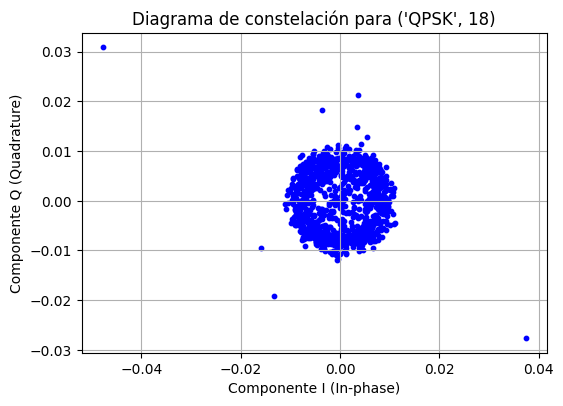

In [64]:
signals = data[key]  # Dimensión (1000, 2, 128)

# Elegir cuántas muestras graficar
# Por ejemplo, graficar las primeras 1000 muestras de I y Q en el último punto temporal (128)
I_samples = signals[:, 0, -1]  # Componente I (1000 muestras)
Q_samples = signals[:, 1, -1]  # Componente Q (1000 muestras)

# Graficar la constelación
plt.figure(figsize=(6,6))
plt.scatter(I_samples, Q_samples, color='blue', s=10)
plt.title(f"Diagrama de constelación para {key}")
plt.xlabel('Componente I (In-phase)')
plt.ylabel('Componente Q (Quadrature)')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [60]:
qpsk_dict = {}

for key, values in data.items():
    if key[0] == 'QPSK':
        qpsk_dict[key] = values

snr_v = []
for key, values in qpsk_dict.items():
    snr = key[1]
    snr_v.append(snr)
print(snr_v)

[2, -20, -6, 8, -16, 6, -2, 12, -12, -18, 16, 10, -14, 0, -8, 14, -10, 4, 18, -4]


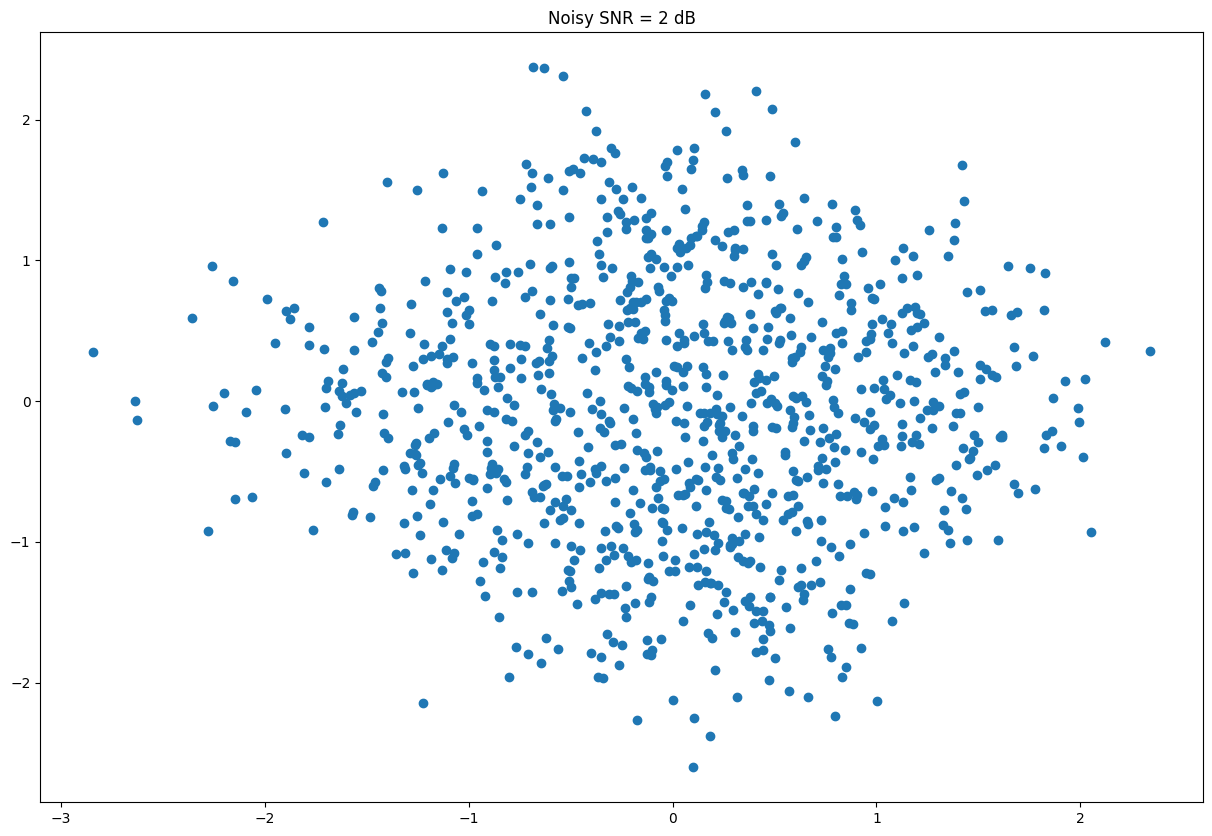

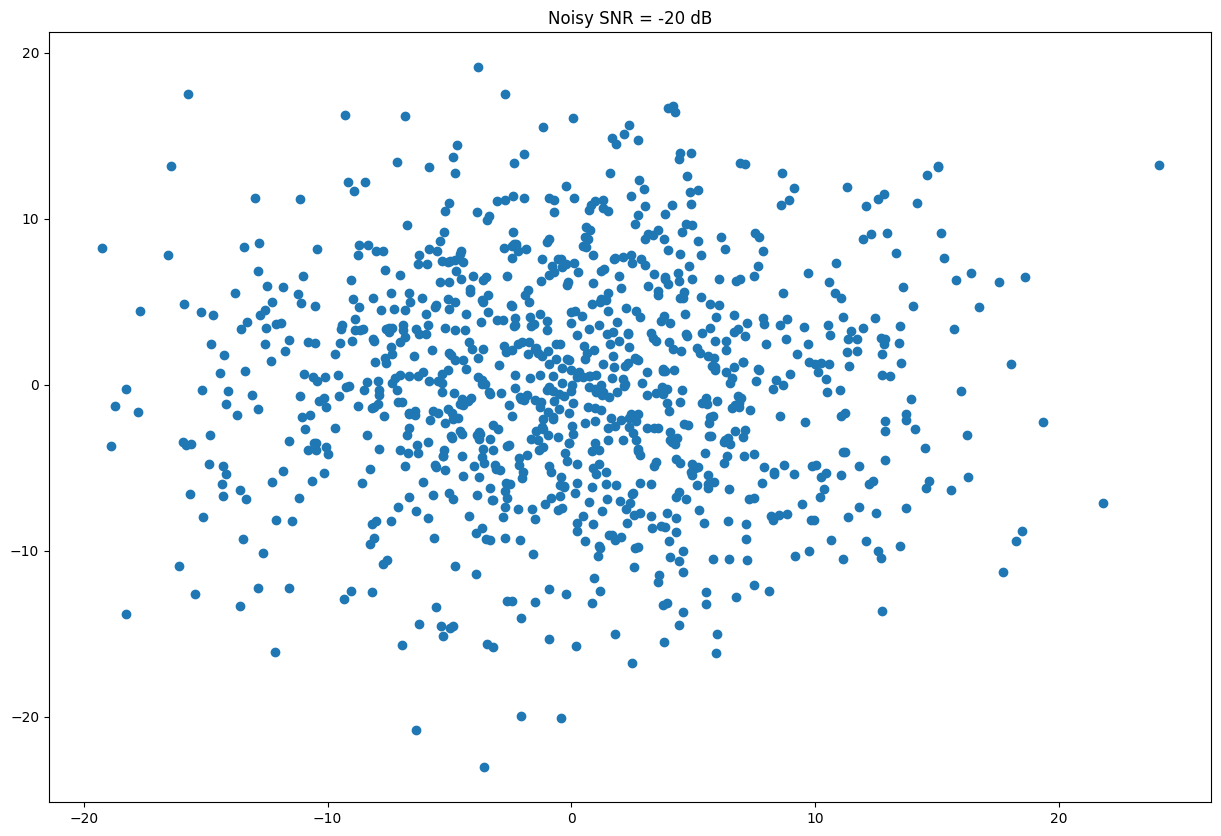

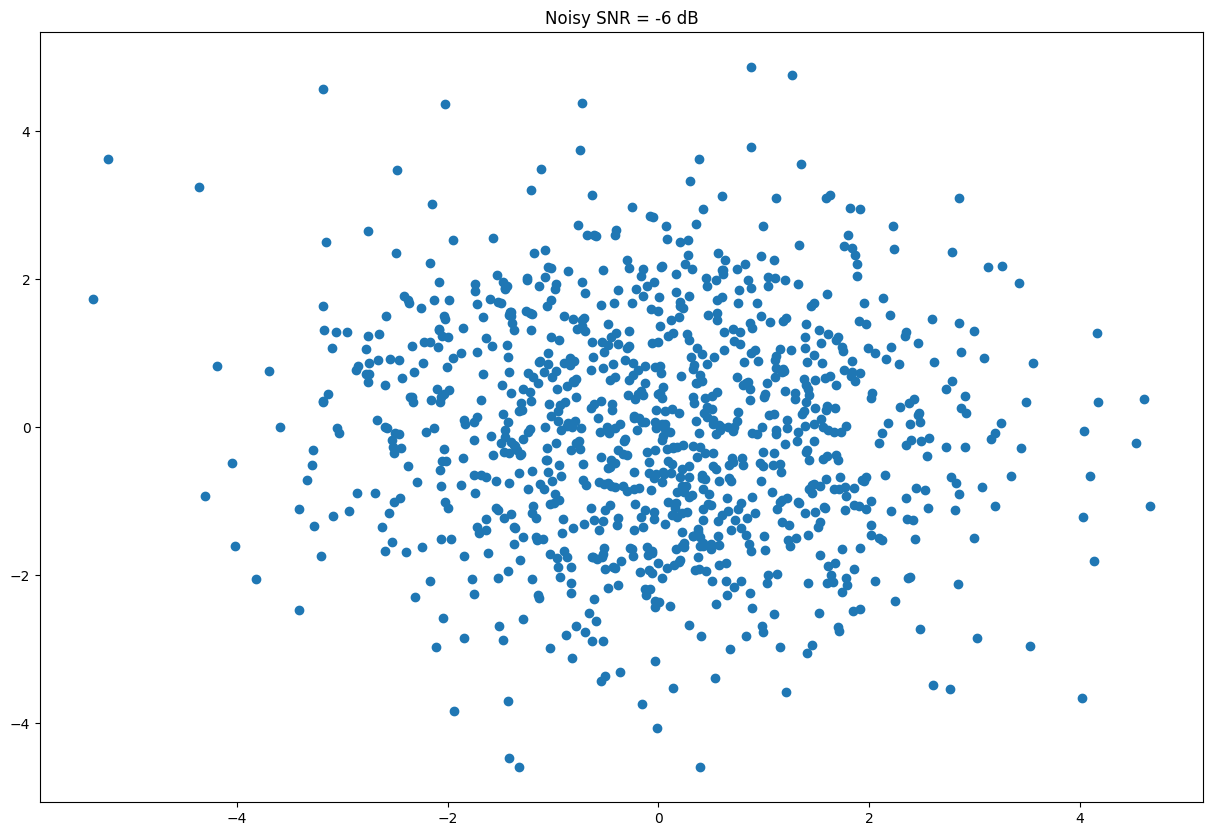

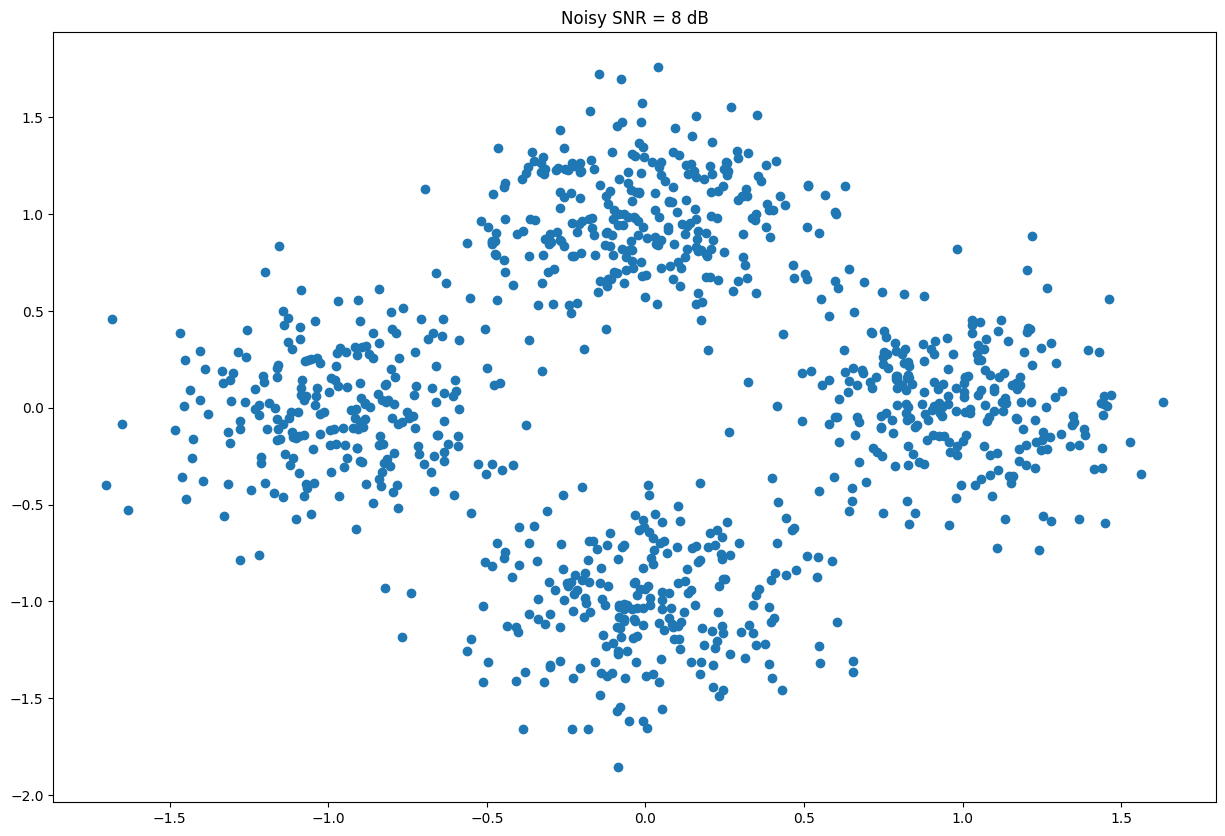

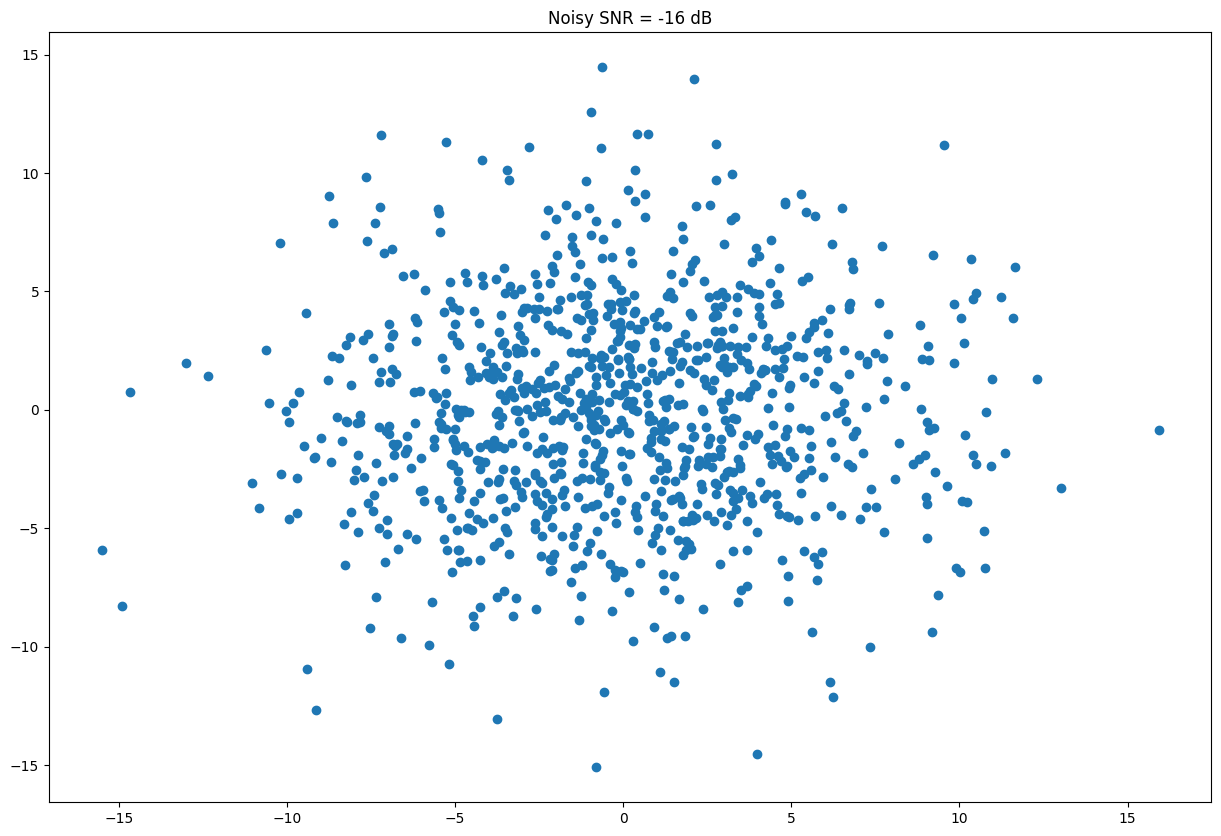

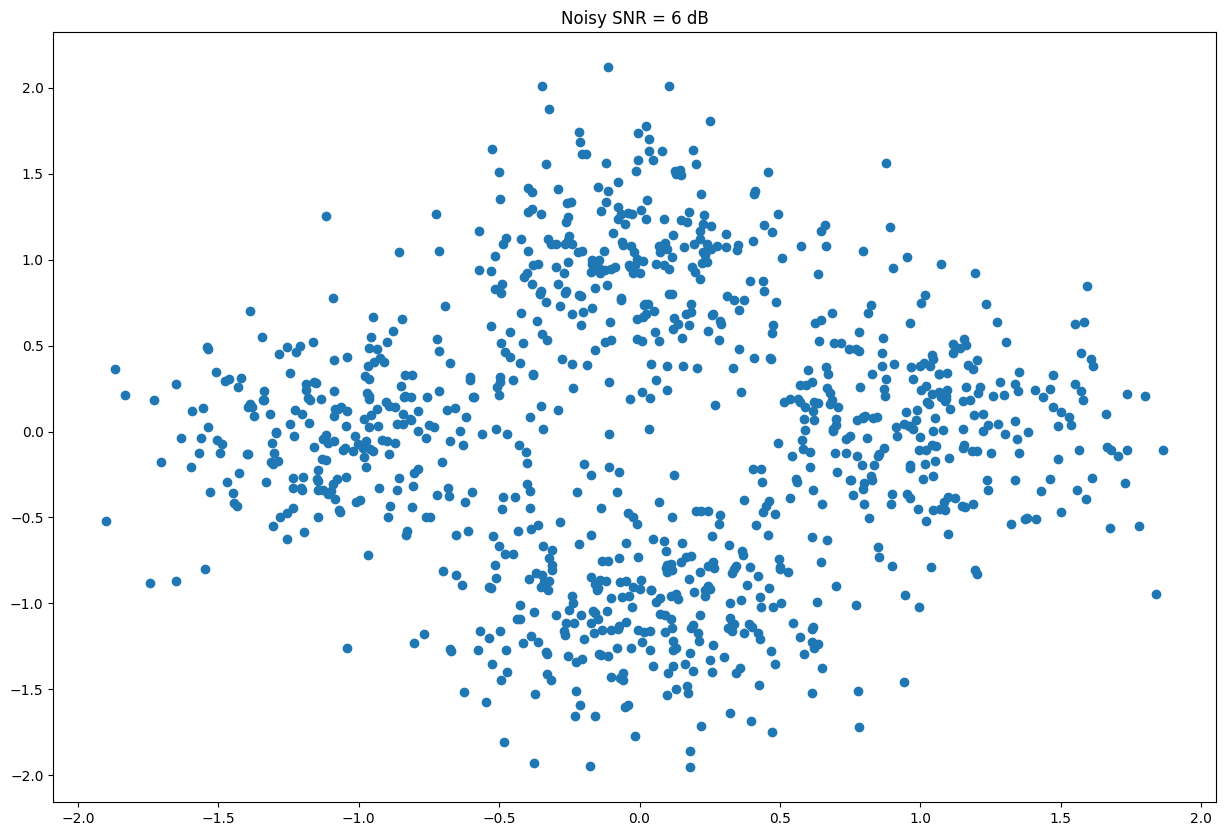

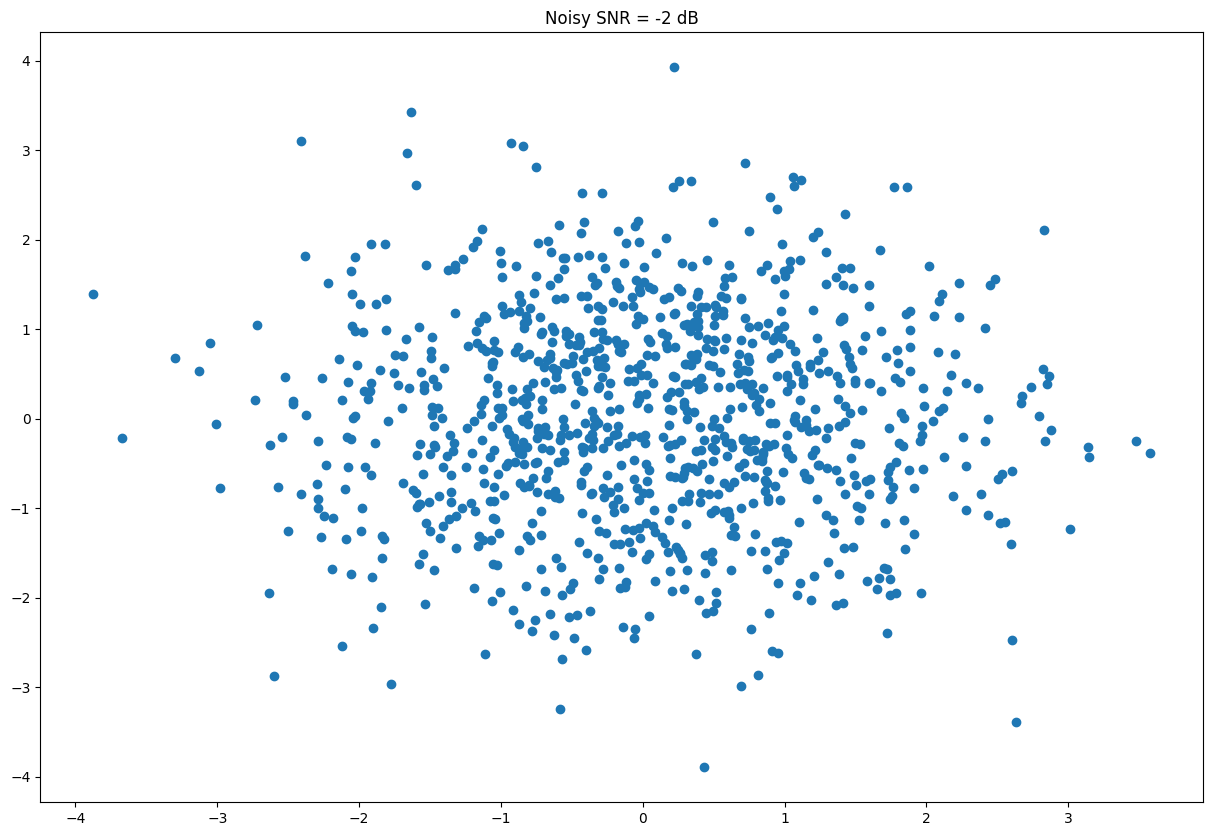

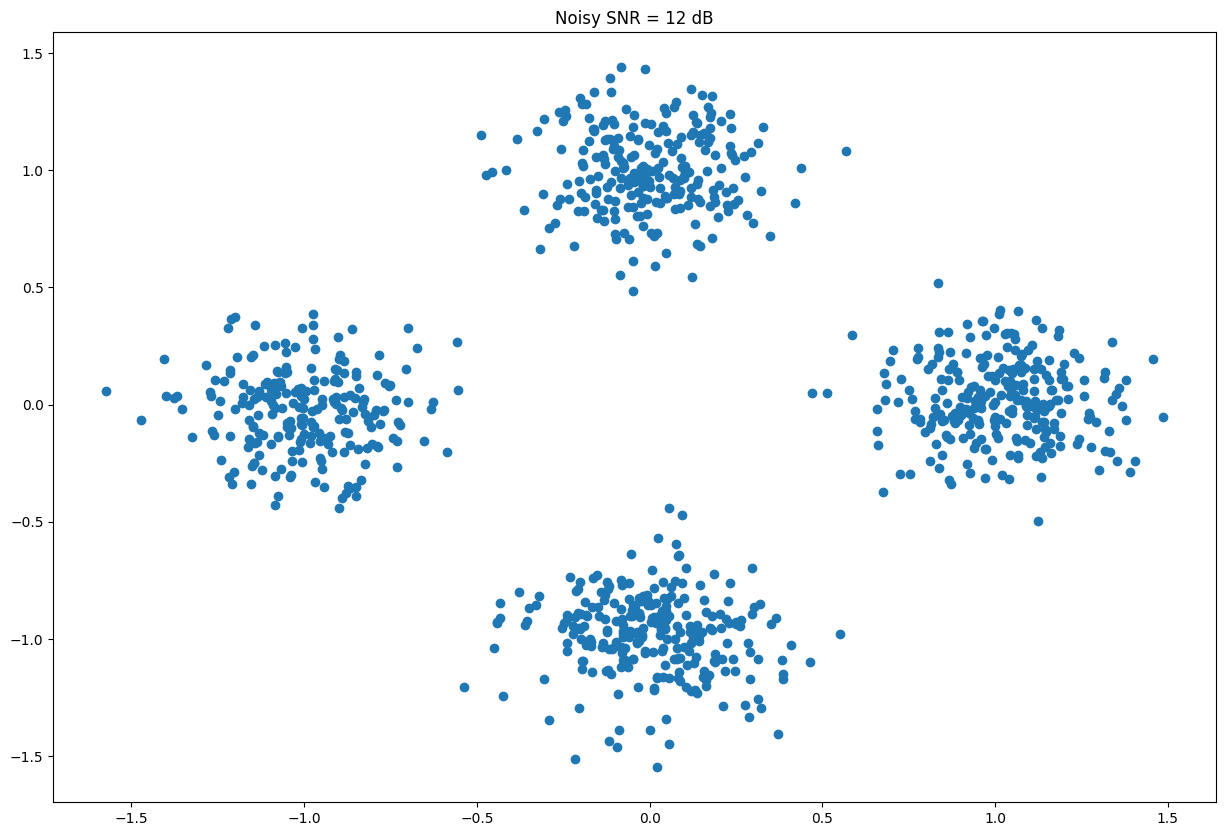

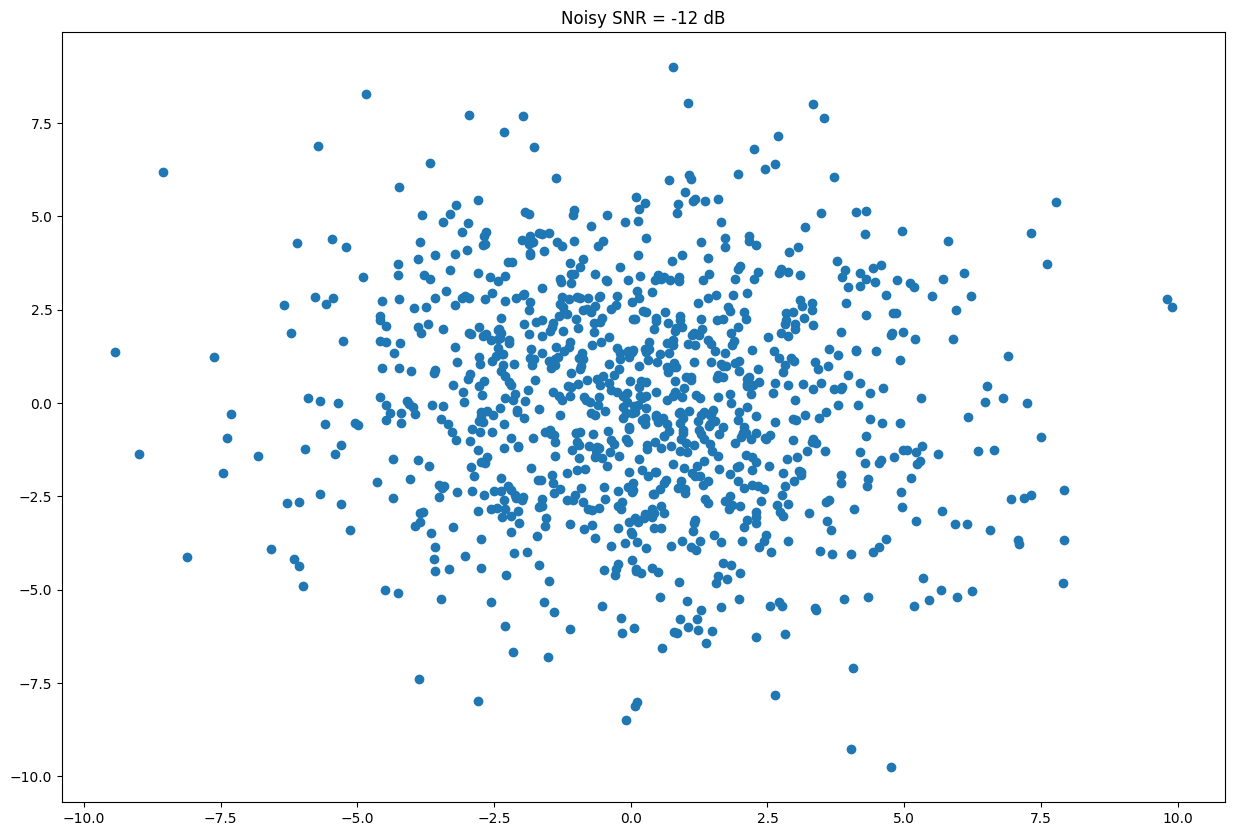

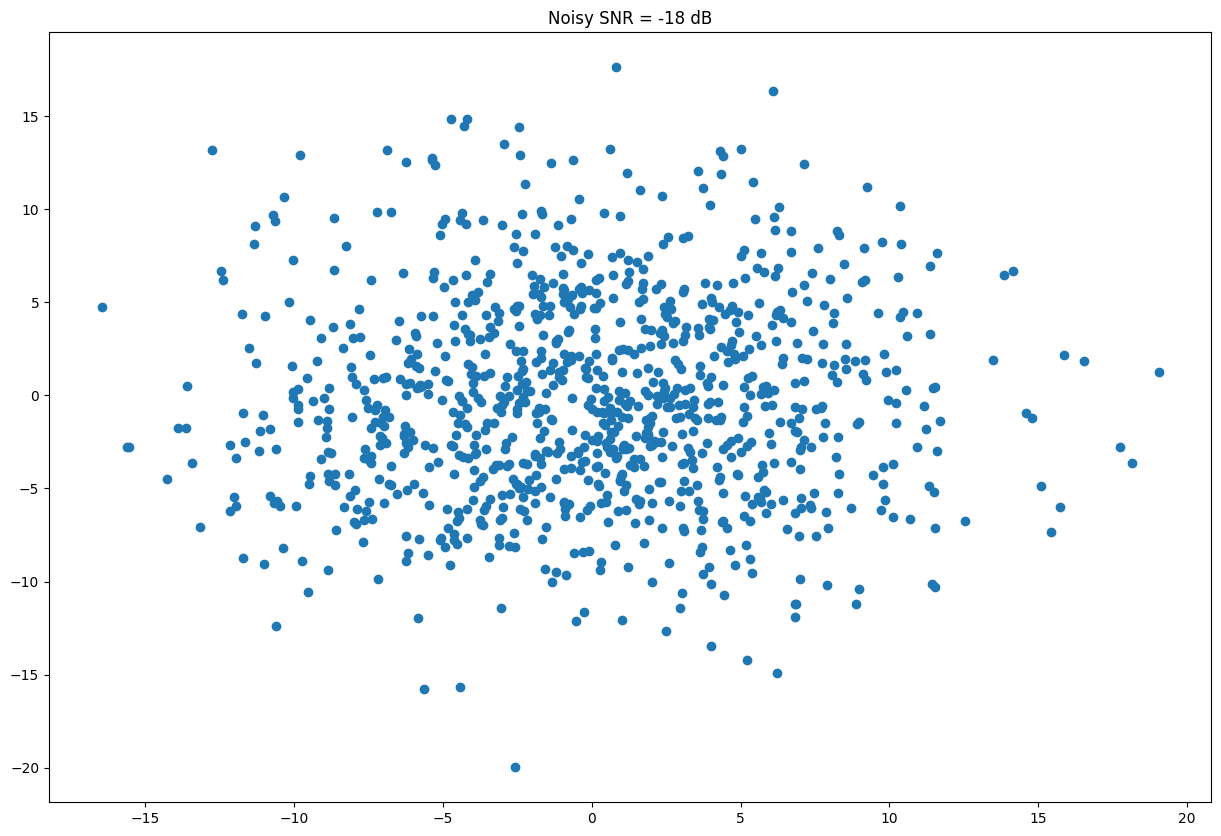

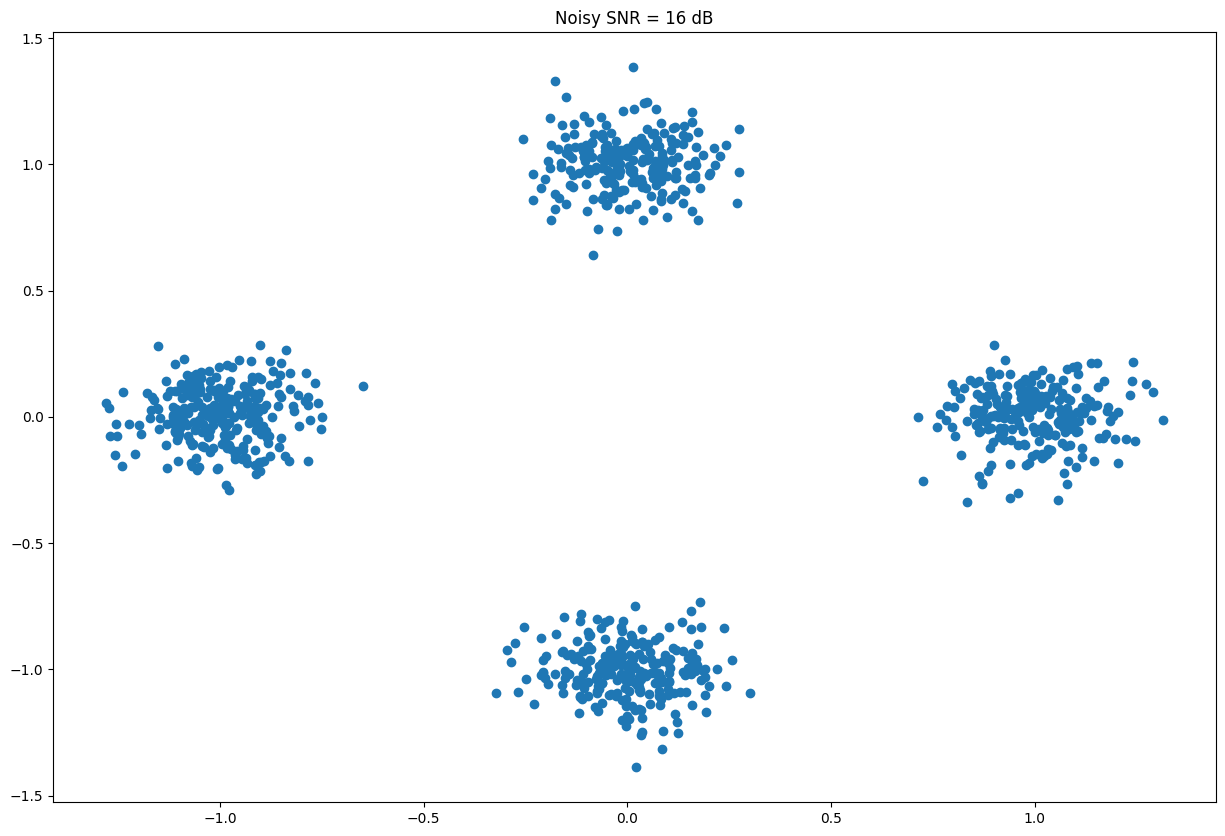

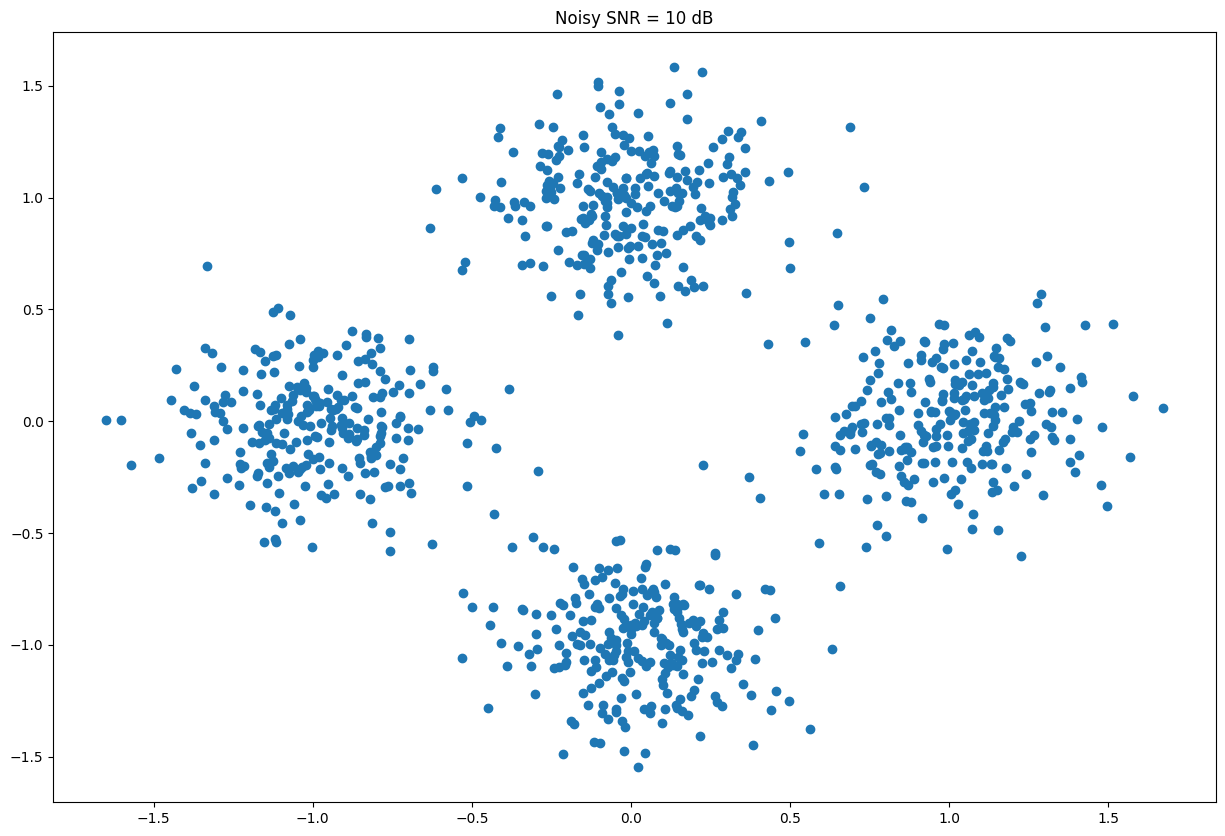

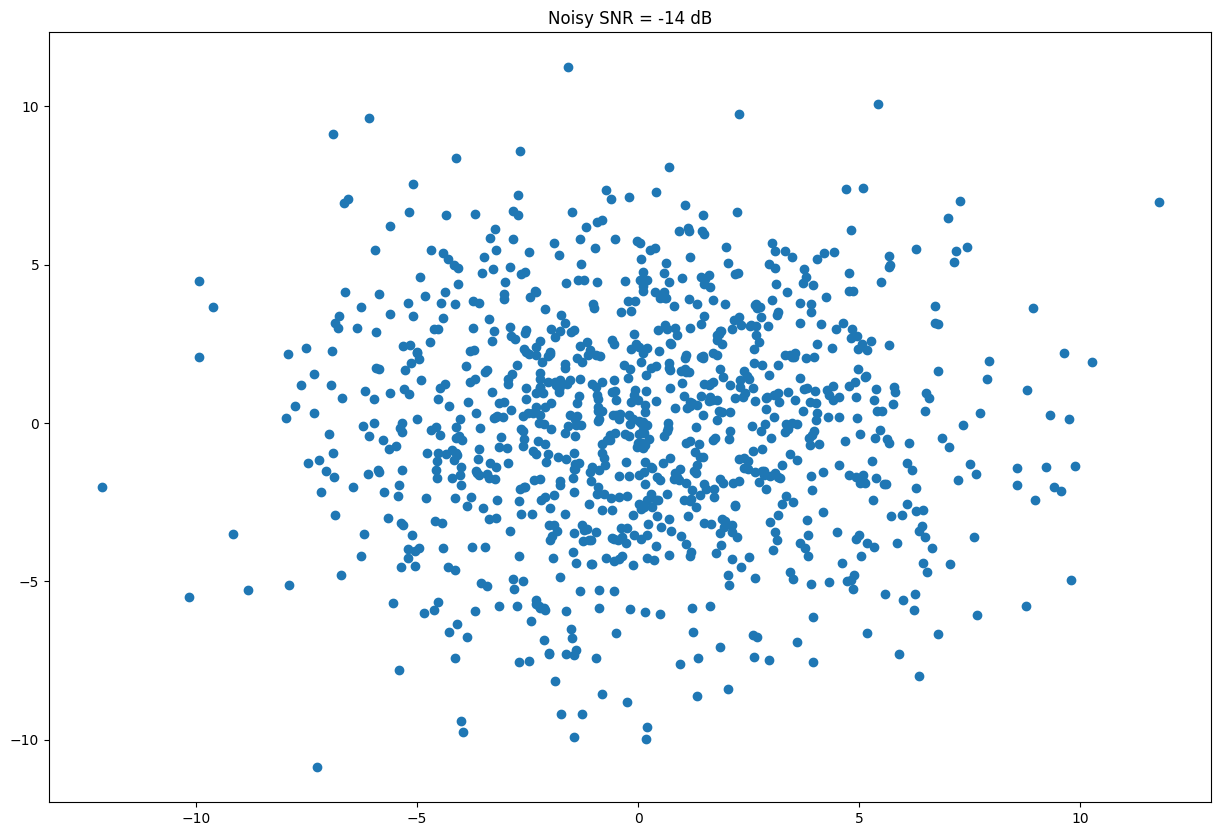

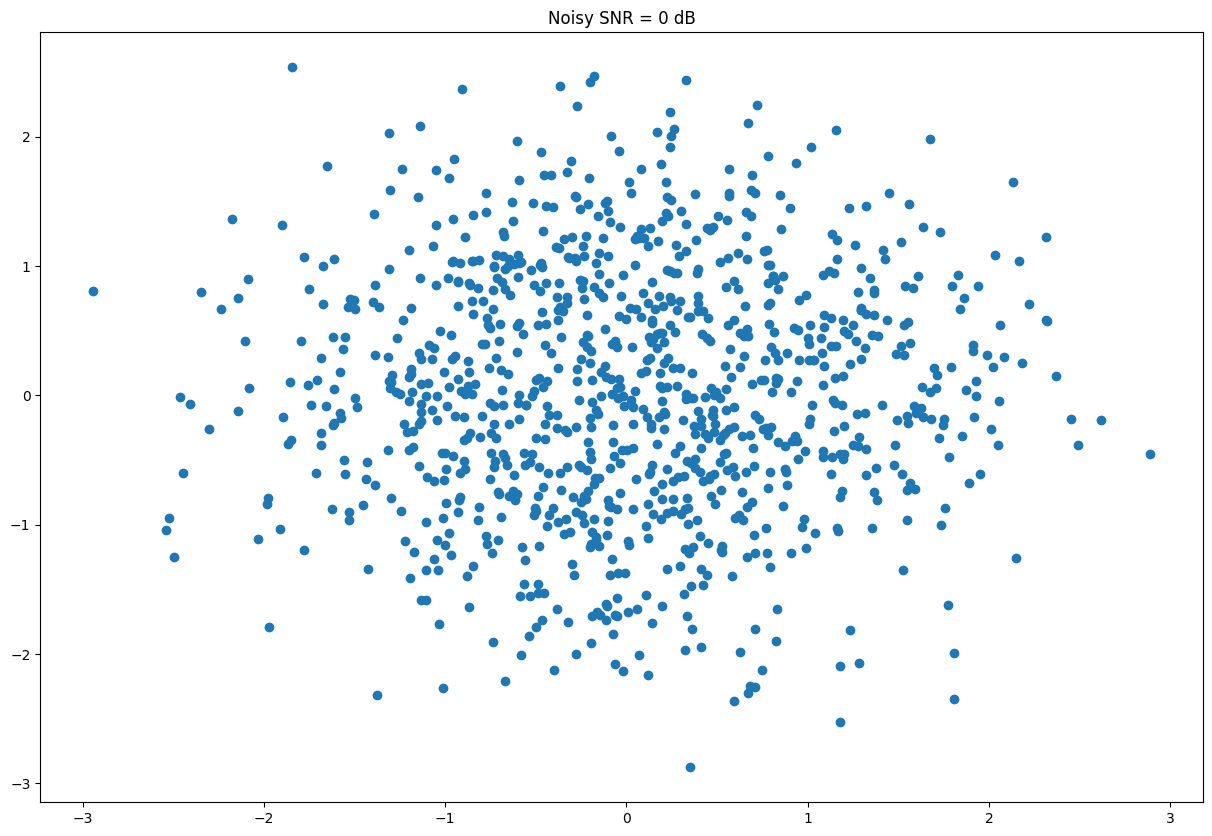

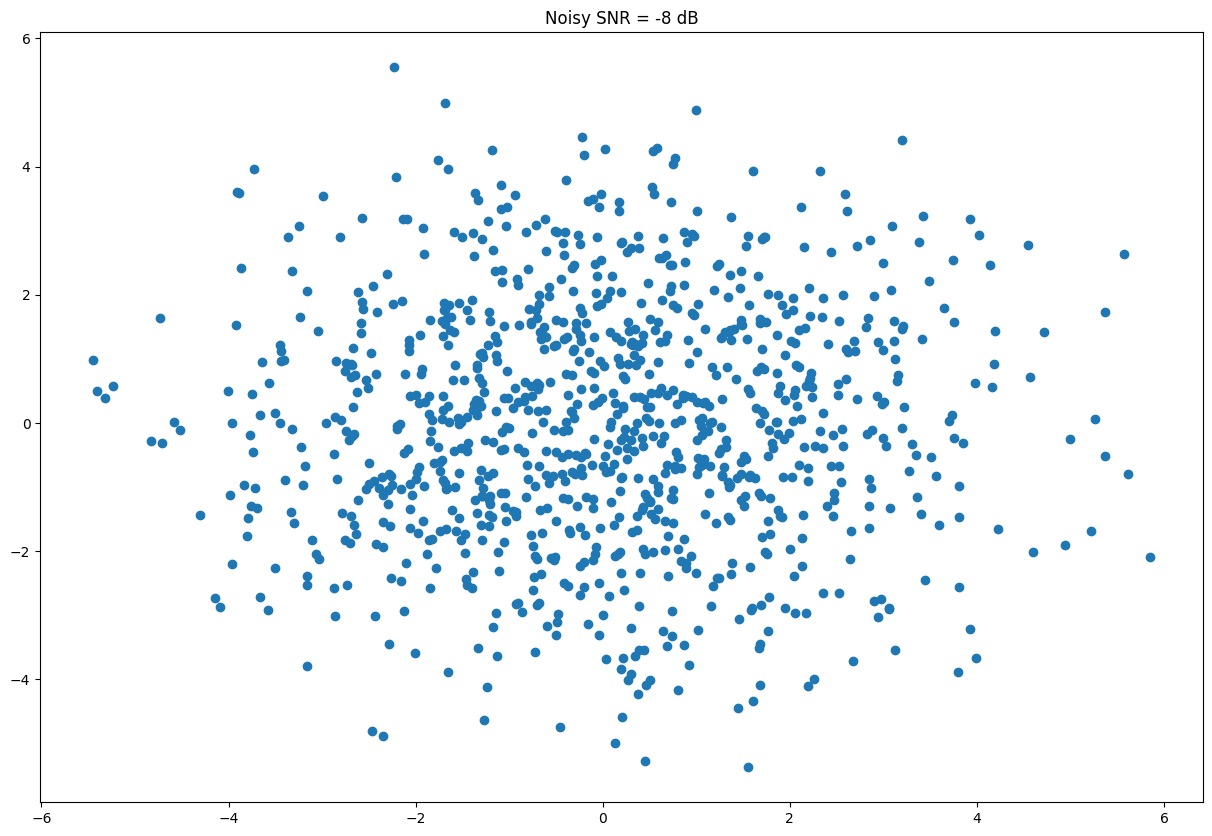

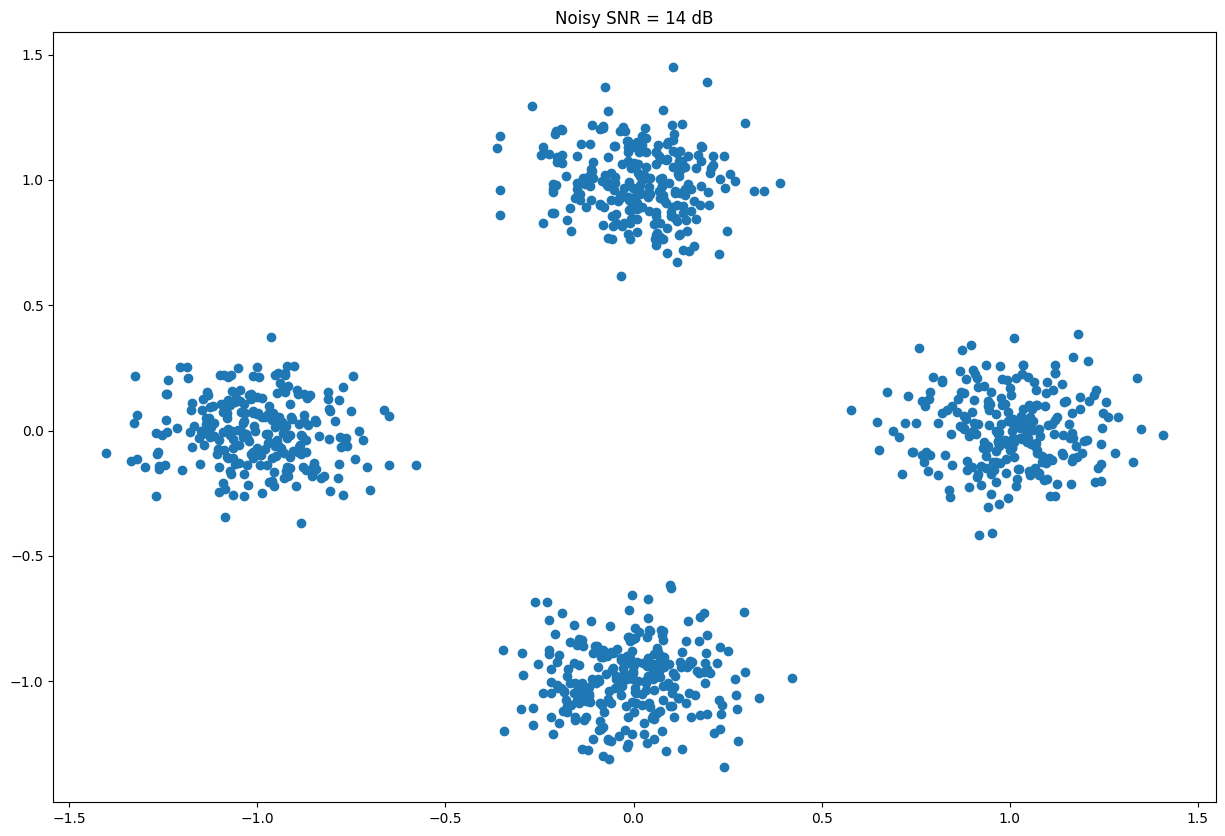

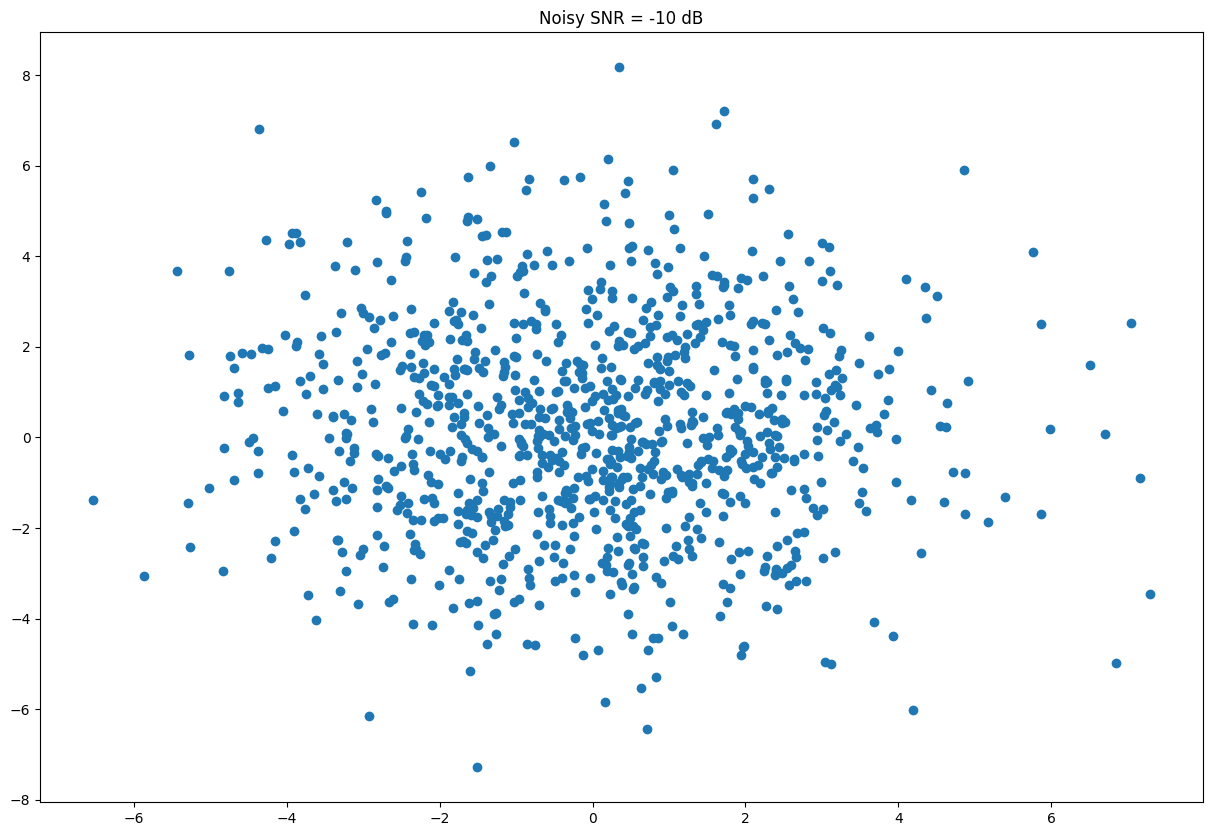

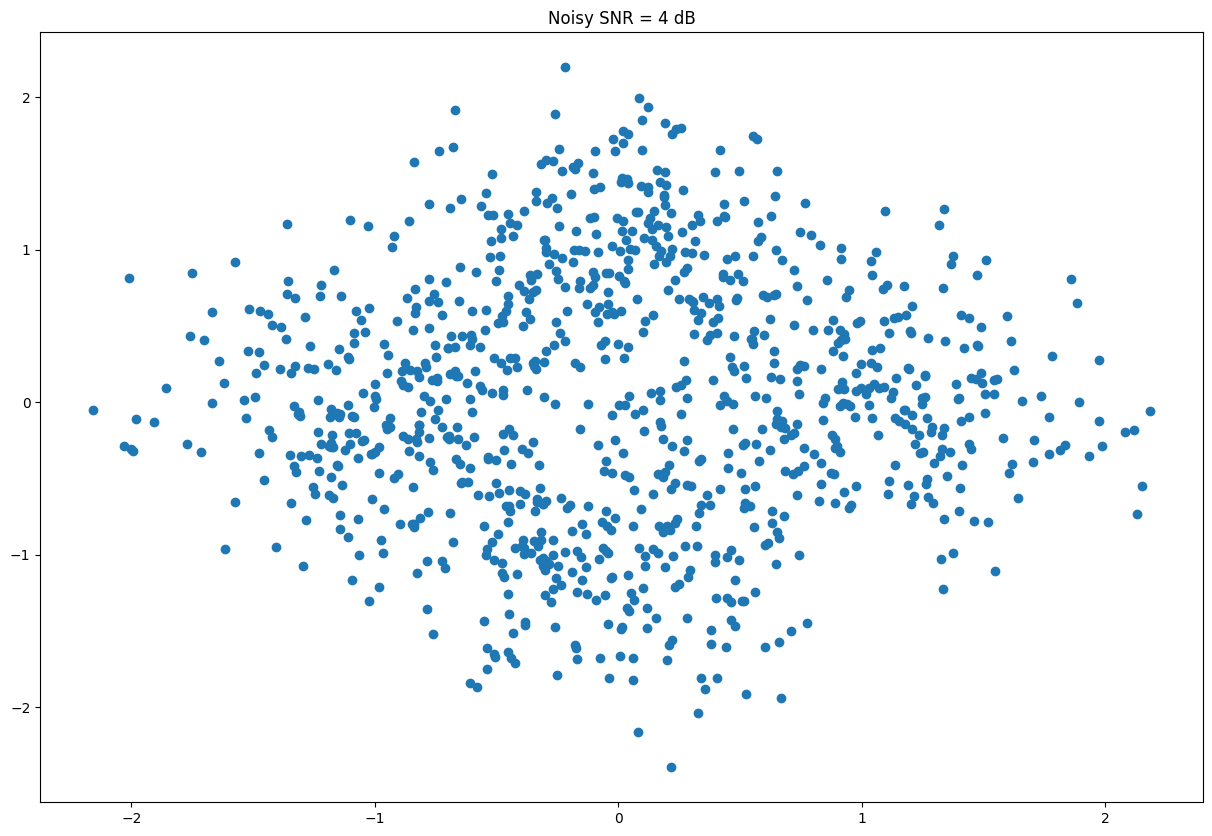

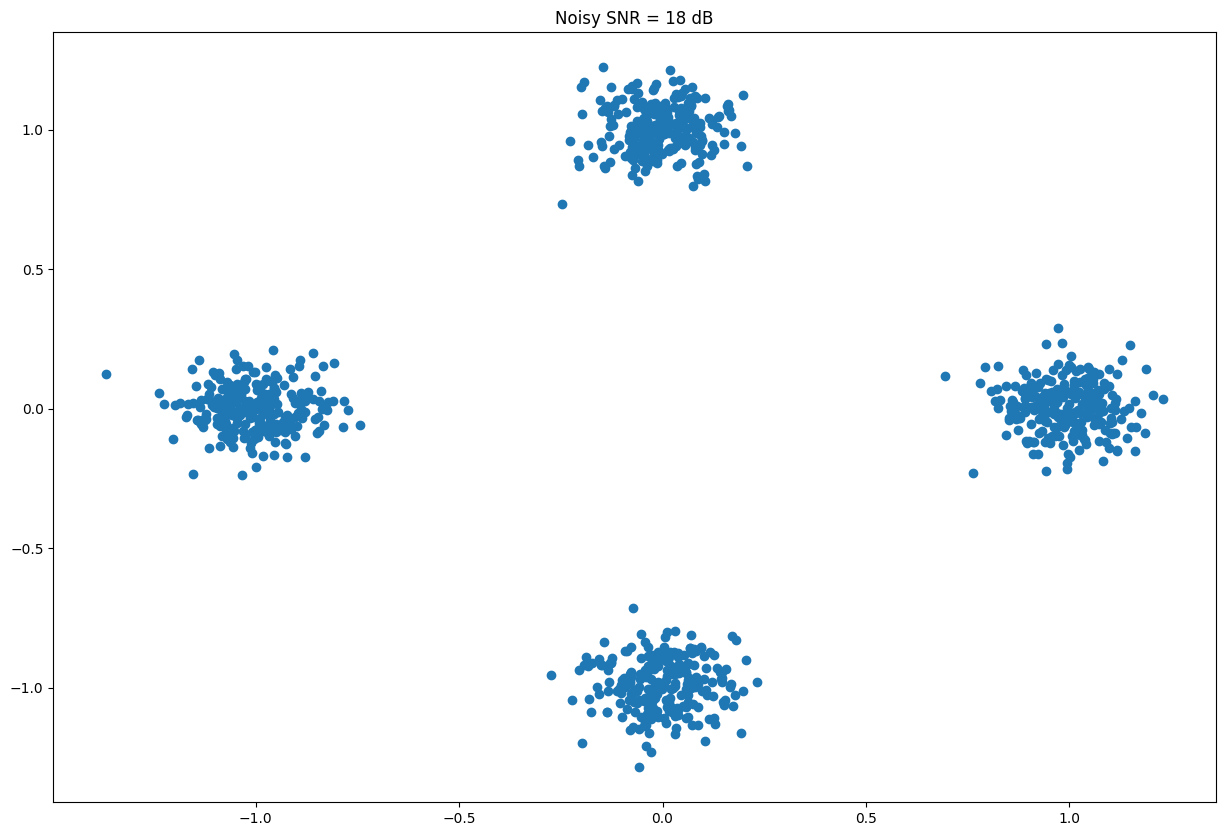

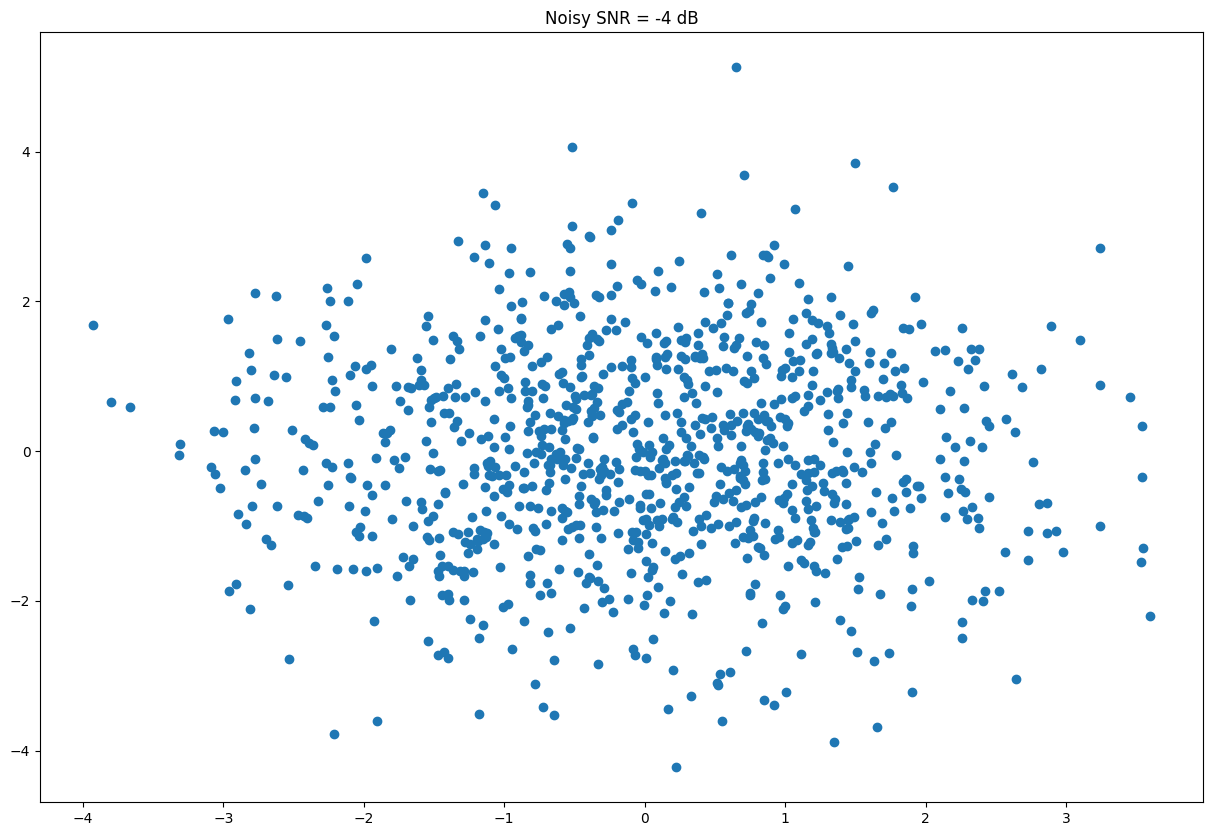

In [61]:
num_symbols = qpsk_dict[('QPSK',2)].shape[0]
snr_levels = snr_v

for snr_db in snr_levels:
    plt.figure(figsize=(15, 10))

    modulated_signal= modulate_psk(4, num_symbols)

    # Añadir ruido
    noisy_signal = add_noise(modulated_signal, snr_db)
    plt.scatter(noisy_signal.real, noisy_signal.imag)
    plt.title(f'Noisy SNR = {snr_db} dB')
    plt.show()